In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer


In [79]:
df = pd.read_csv("data/concrete_data.csv")
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [80]:
df.isna().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [81]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [82]:
# train test split
X = df.drop(columns=['Strength'])
y = df.iloc[:,-1]

In [83]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [84]:
clf = LinearRegression()

In [85]:
clf.fit(X_train,y_train)

LinearRegression()

In [86]:
y_pred = clf.predict(X_test)

In [87]:
r2_score(y_test,y_pred)

0.5795595523944662

In [88]:
# cross val score
clf = LinearRegression()
cross_val_score(clf,X,y,cv=10,scoring='r2').mean()

0.27820729160873786

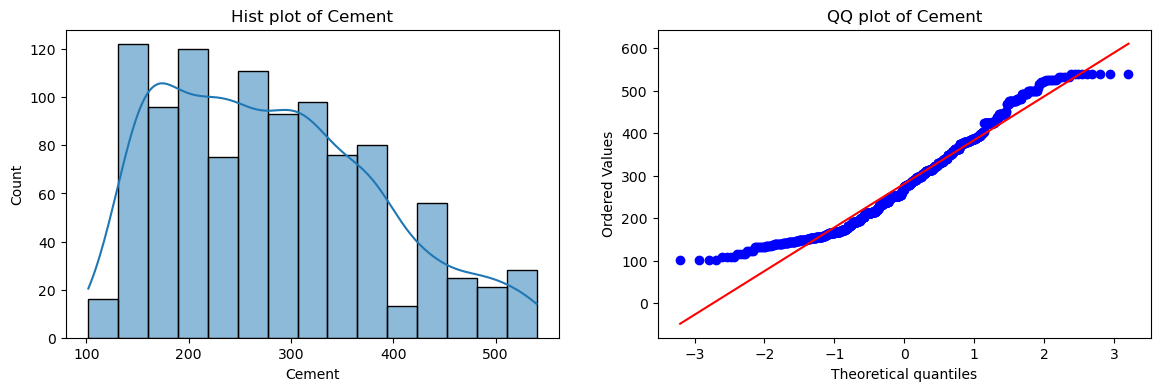

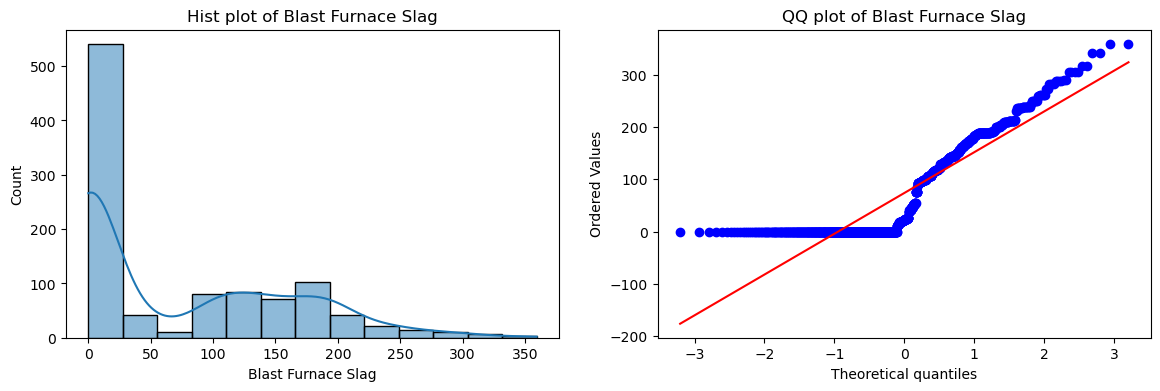

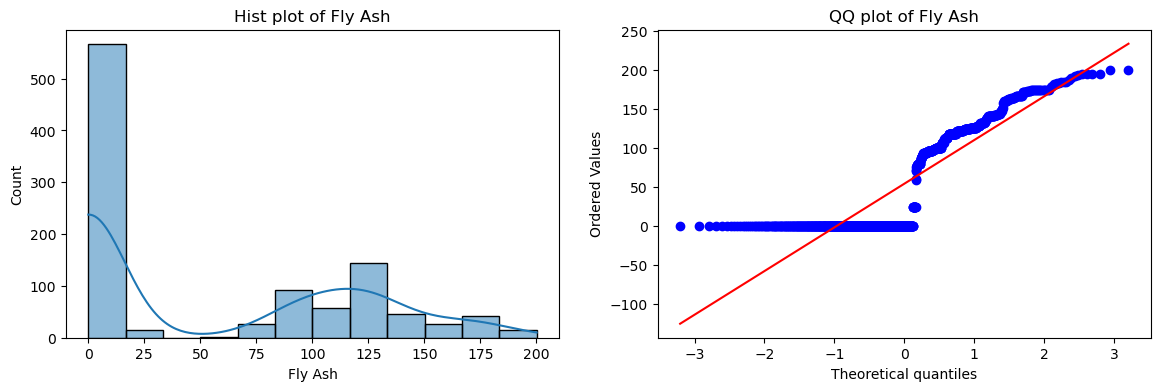

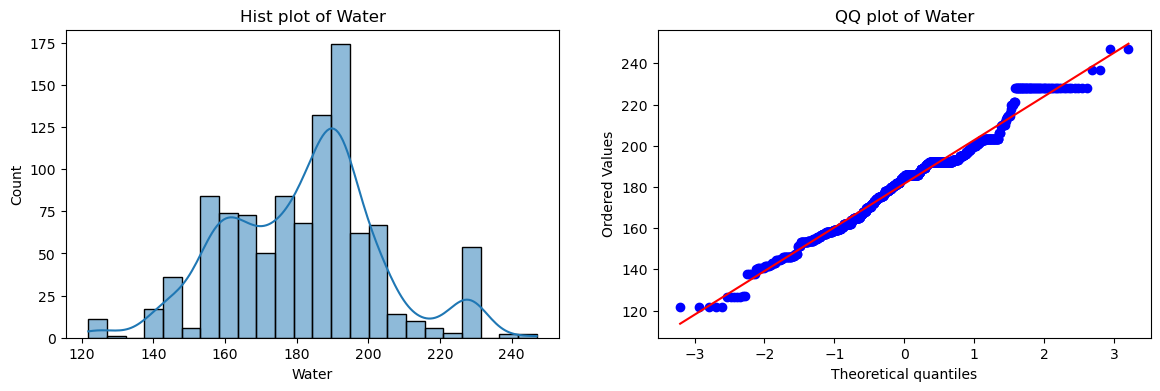

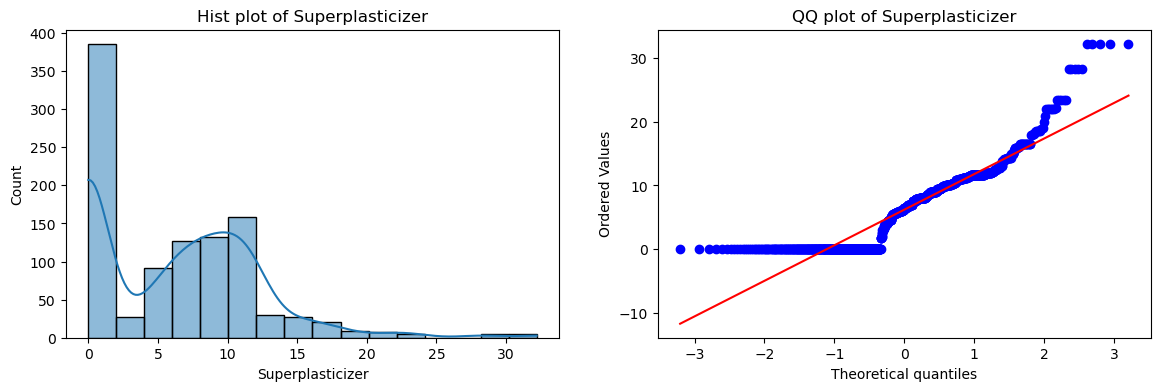

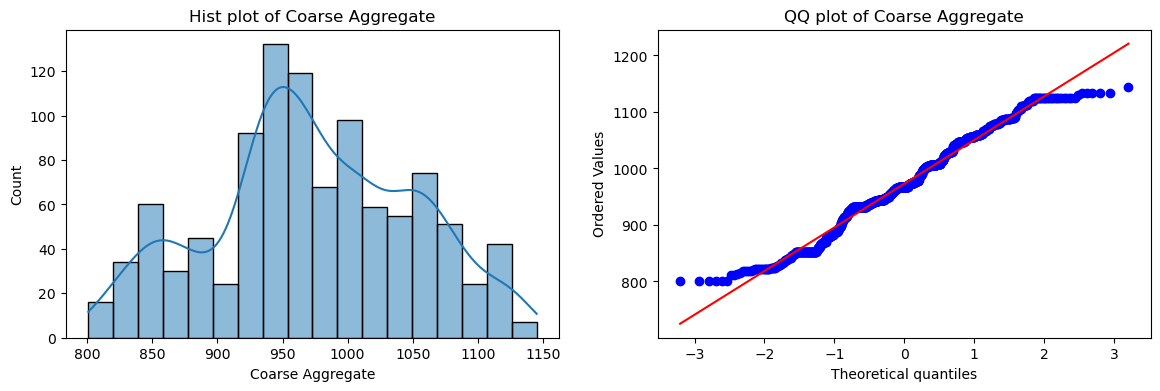

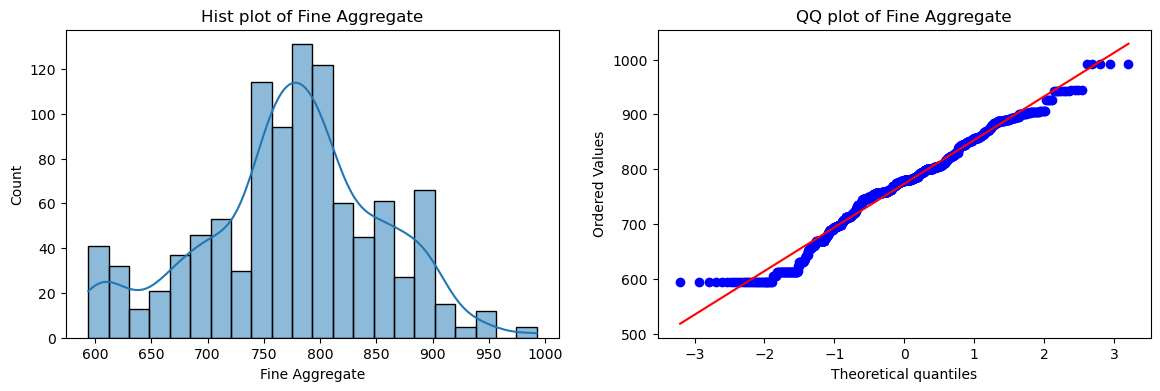

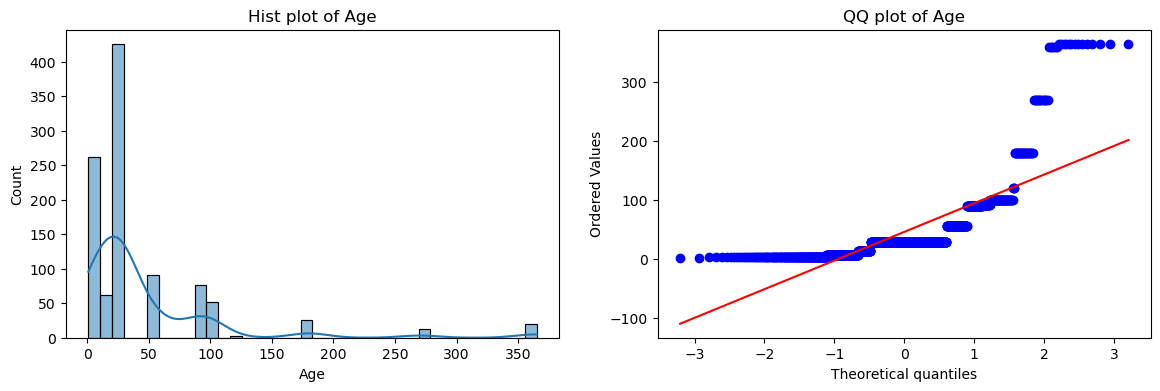

In [89]:
#lets see how our data is distributed 
for col in X.columns:
    fig,ax = plt.subplots(1,2,figsize=(14,4))

    sns.histplot(X[col],kde=True,ax=ax[0])
    ax[0].set_title("Hist plot of "+col)

    stats.probplot(X[col],dist='norm',plot=ax[1])
    ax[1].set_title("QQ plot of "+col)

    plt.show()

# Now apply power transform

In [90]:
# train test split
X = df.drop(columns=['Strength'])
y = df.iloc[:,-1]

In [91]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [92]:
pt = PowerTransformer(method='box-cox')

In [93]:
X_train_transform = pt.fit_transform(X_train+0.0000001)
X_test_transform = pt.fit_transform(X_test+0.0000001)

In [94]:
clf = LinearRegression()
clf.fit(X_train_transform,y_train)

LinearRegression()

In [95]:
y_pred = clf.predict(X_test_transform)

In [96]:
r2_score(y_test,y_pred)

0.7792170438571434

In [97]:
# cross val score
pt = PowerTransformer(method='box-cox')
X_train_transform = pt.fit_transform(X_train+0.0000001)
lr = LinearRegression()

cross_val_score(lr,X_train_transform,y_train,cv=10,scoring='r2').mean()

0.7982591530932788

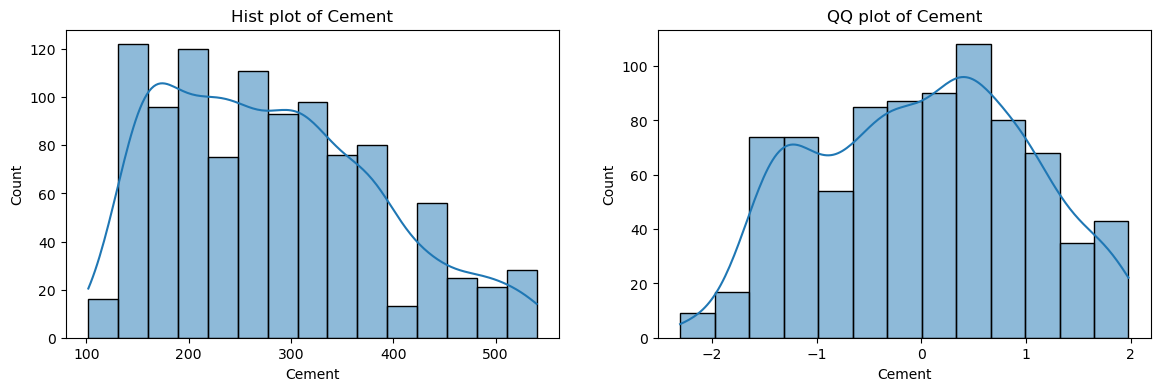

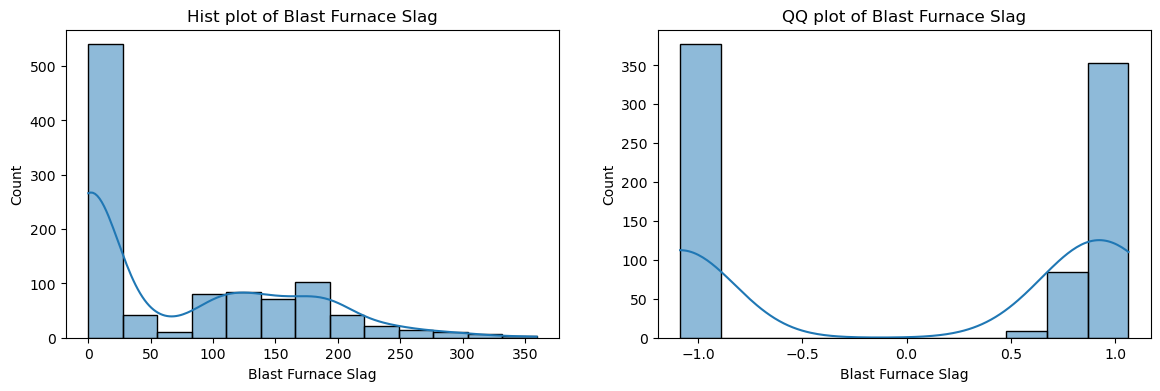

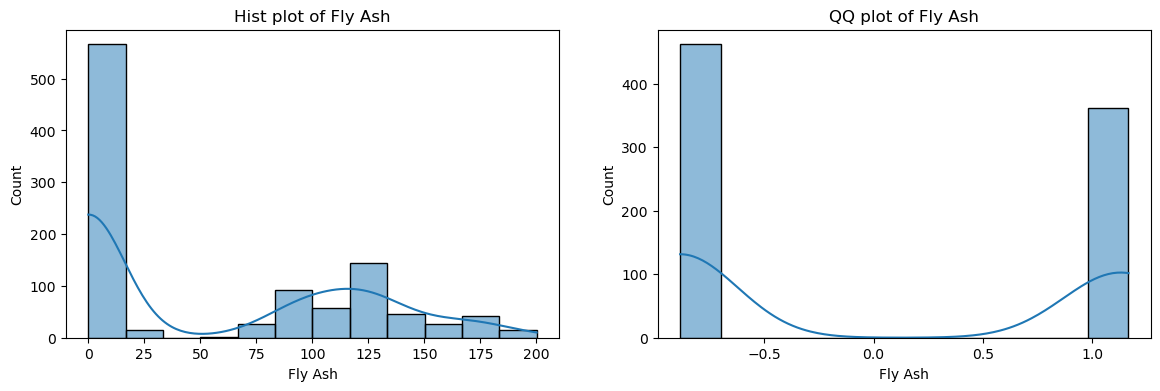

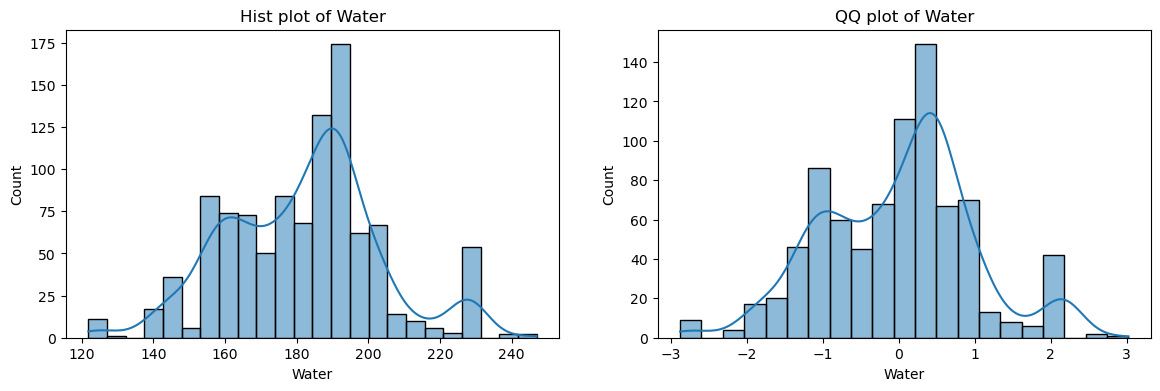

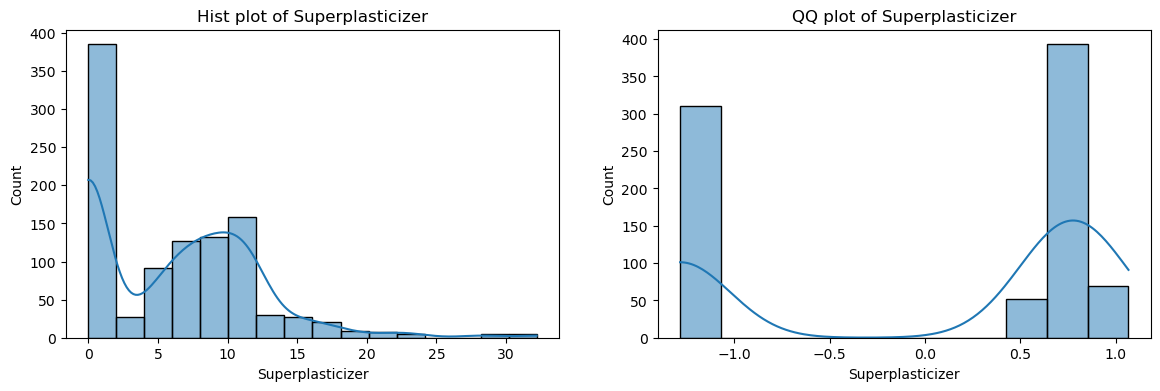

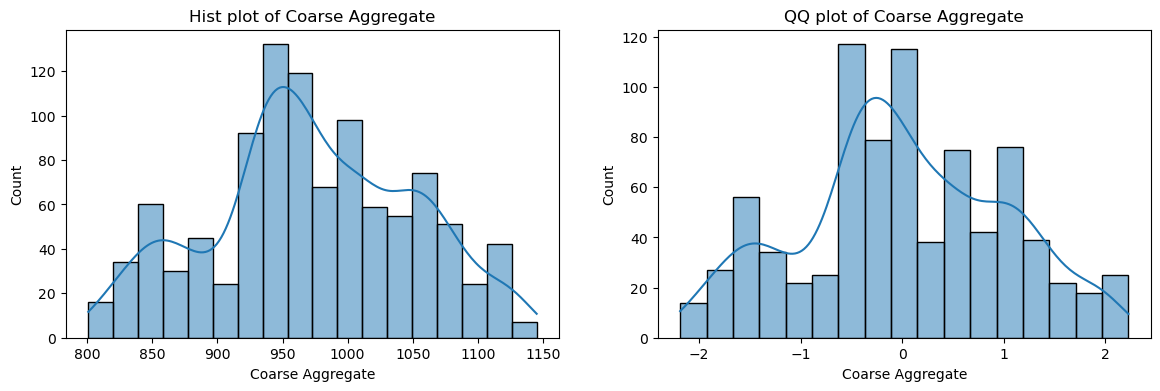

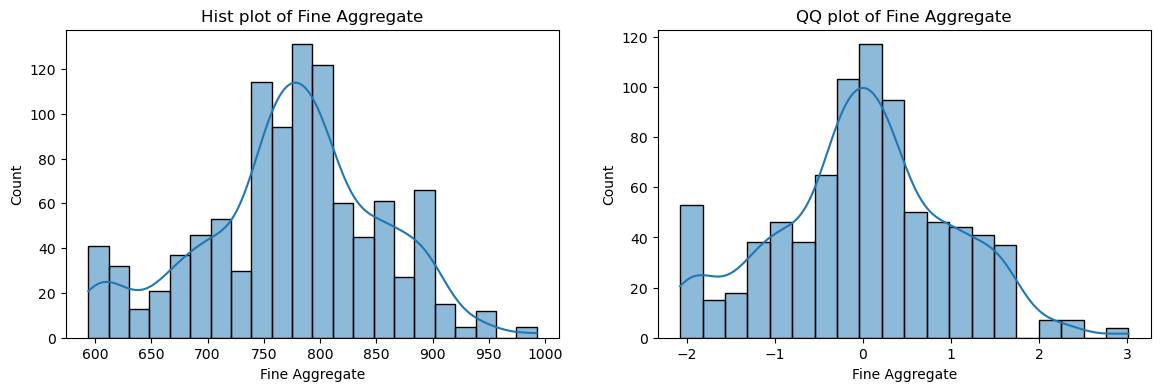

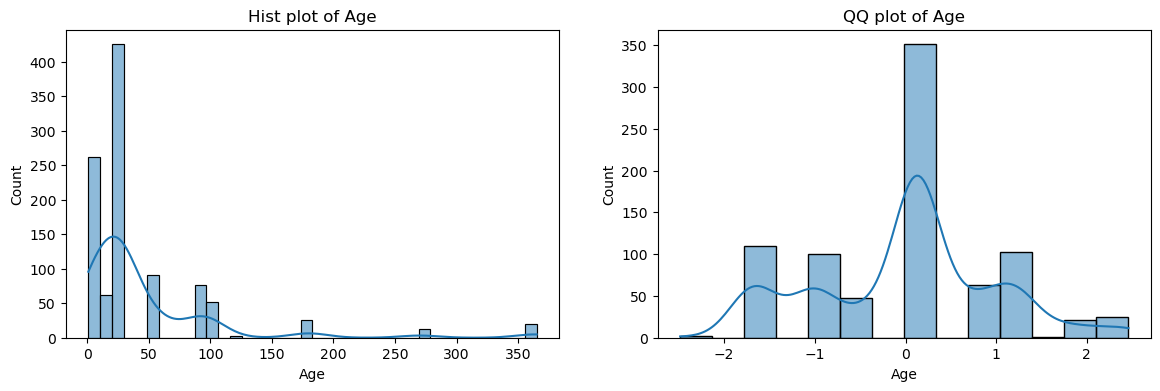

In [98]:
# Before and after comparision for Box-Cox Plot
X_train_transformed = pd.DataFrame(X_train_transform,columns=X_train.columns)

for col in X_train_transformed.columns:
    fig,ax = plt.subplots(1,2,figsize=(14,4))

    sns.histplot(X[col],kde=True,ax=ax[0])
    ax[0].set_title("Hist plot of "+col)

    sns.histplot(X_train_transformed[col],kde=True,ax=ax[1])
    ax[1].set_title("QQ plot of "+col)

    plt.show()

In [99]:
# Apply Yeo-Johnson transform

pt1 = PowerTransformer()

X_train_transformed2 = pt1.fit_transform(X_train)
X_test_transformed2 = pt1.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_transformed2,y_train)

y_pred3 = lr.predict(X_test_transformed2)

print(r2_score(y_test,y_pred3))

pd.DataFrame({'cols':X_train.columns,'Yeo_Johnson_lambdas':pt1.lambdas_})

0.7849595777820106


,cols,Yeo_Johnson_lambdas
0,Cement,0.208109
1,Blast Furnace Slag,0.011621
2,Fly Ash,-0.162425
3,Water,0.875836
4,Superplasticizer,0.234171
5,Coarse Aggregate,1.007095
6,Fine Aggregate,1.845355
7,Age,0.001218


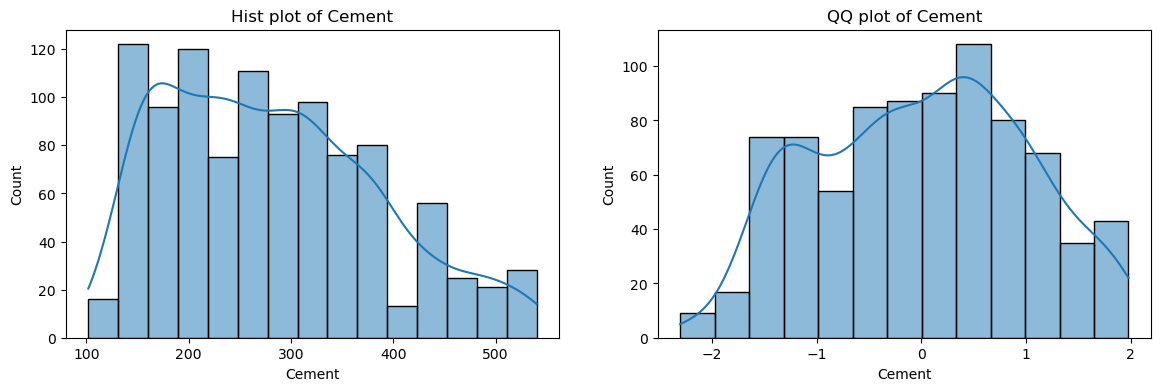

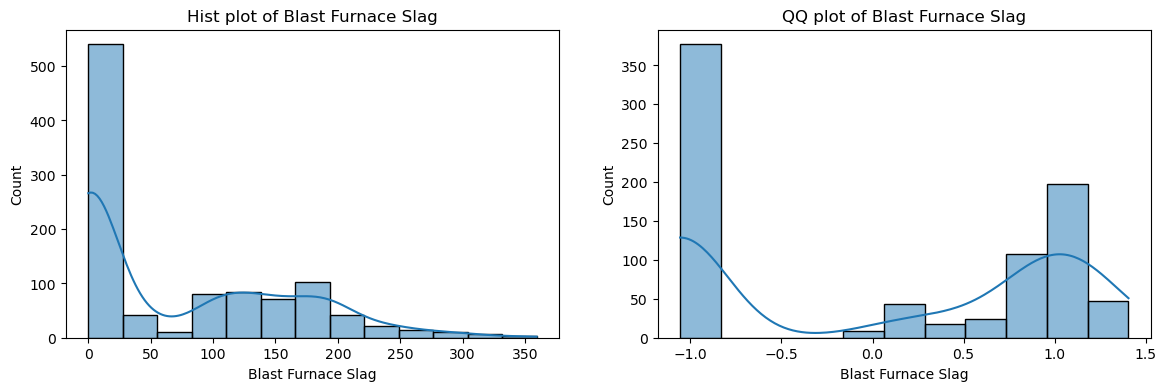

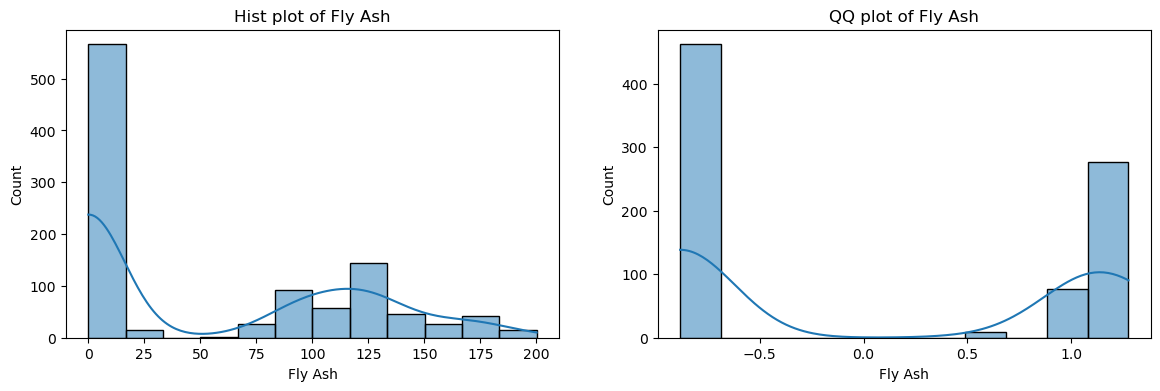

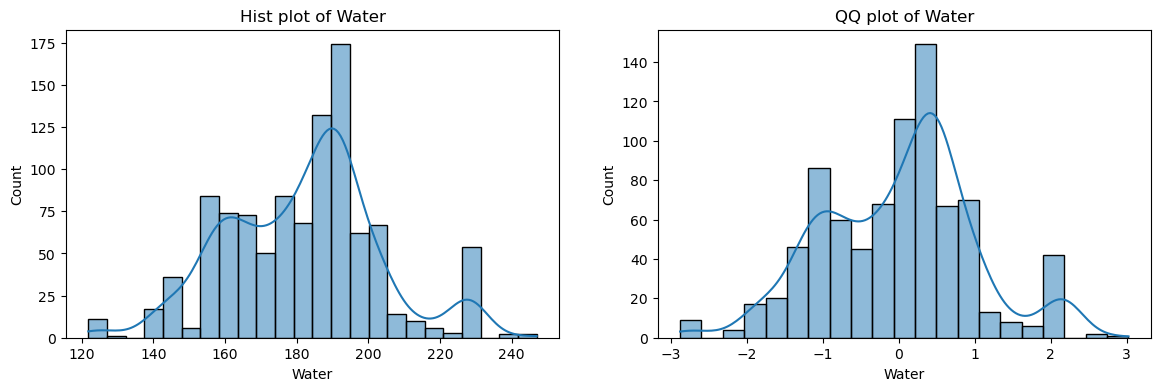

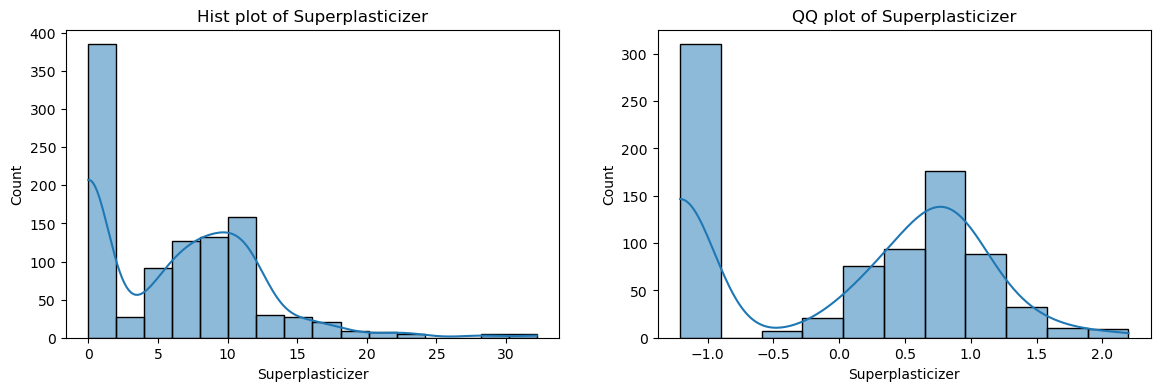

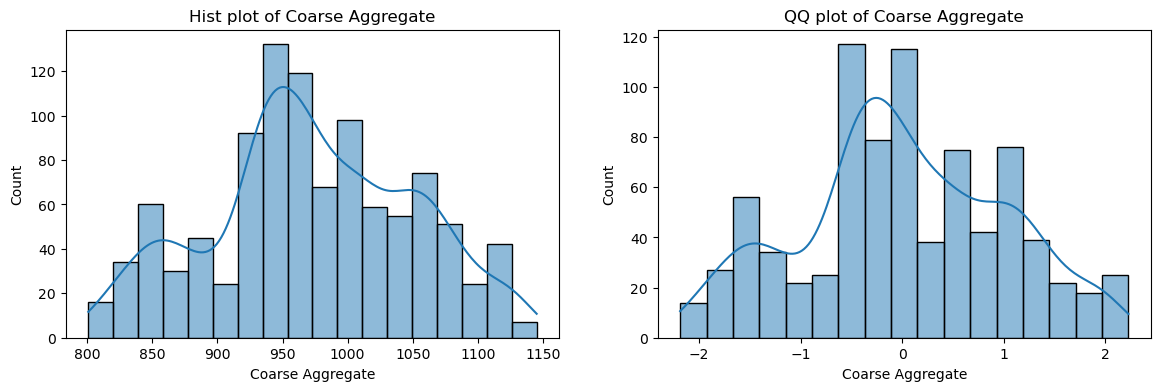

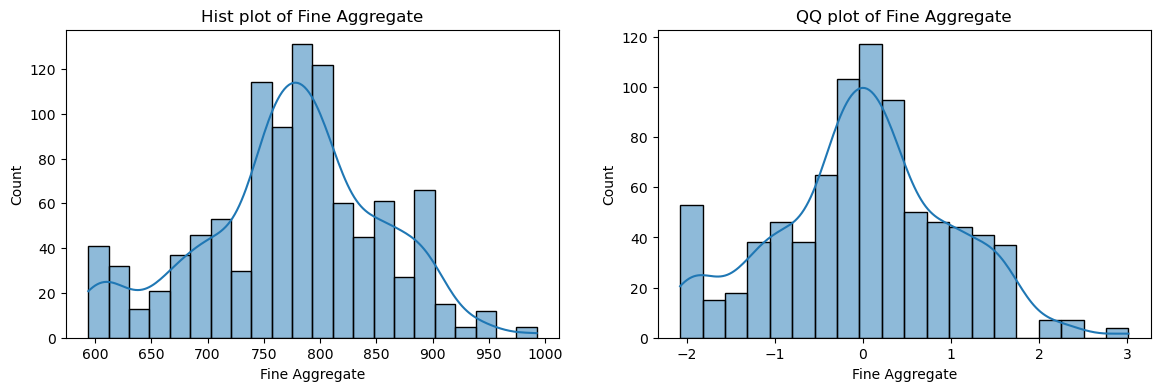

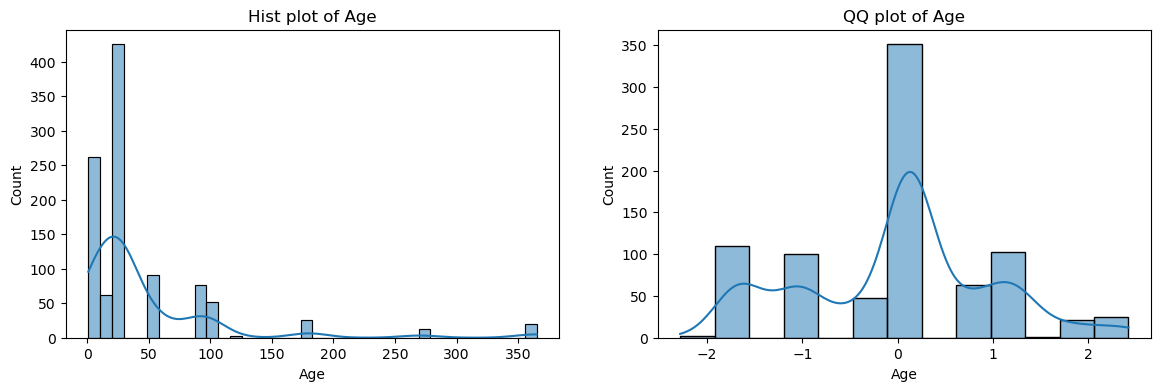

In [100]:
# Before and after comparision for yeo-johnson Plot
X_train_transformed = pd.DataFrame(X_train_transformed2,columns=X_train.columns)

for col in X_train_transformed.columns:
    fig,ax = plt.subplots(1,2,figsize=(14,4))

    sns.histplot(X[col],kde=True,ax=ax[0])
    ax[0].set_title("Hist plot of "+col)

    sns.histplot(X_train_transformed[col],kde=True,ax=ax[1])
    ax[1].set_title("QQ plot of "+col)

    plt.show()

In [101]:
# Side by side Lambdas
pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_,'Yeo_Johnson_lambdas':pt1.lambdas_})

# this lambdas are power

,cols,box_cox_lambdas,Yeo_Johnson_lambdas
0,Cement,0.210650,0.208109
1,Blast Furnace Slag,0.022703,0.011621
2,Fly Ash,-0.035309,-0.162425
3,Water,0.876555,0.875836
4,Superplasticizer,0.081916,0.234171
5,Coarse Aggregate,1.006998,1.007095
6,Fine Aggregate,1.844190,1.845355
7,Age,0.049347,0.001218
